<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/lineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Auto MPG Veri Seti Hikayesi

## Veri Seti Hikayesi
**Auto MPG veri seti**, araçların yakıt tüketimi (MPG - Miles Per Gallon) ile ilgili çeşitli özelliklerini içeren bir veri setidir. Bu veri seti, araçların çevresel etkilerini ve yakıt ekonomilerini analiz etmek için sıklıkla kullanılır. İlk olarak UCI Machine Learning Repository'de yayımlanan veri seti, aşağıdaki özellikleri içermektedir:

### Özellikler:
1. **MPG (Miles per Gallon)**: Aracın yakıt tüketim performansı (hedef değişken).
2. **Cylinders (Silindir Sayısı)**: Aracın motorundaki silindir sayısı.
3. **Displacement (Motor Hacmi)**: Motorun hacmi (inç³ cinsinden).
4. **Horsepower (Beygir Gücü)**: Aracın motor gücü.
5. **Weight (Ağırlık)**: Aracın toplam ağırlığı (pound cinsinden).
6. **Acceleration (İvme)**: Aracın 0-60 mil/saat hızlanma süresi (saniye cinsinden).
7. **Model Year (Model Yılı)**: Aracın üretim yılı.
8. **Origin (Menşei)**: Aracın üretildiği bölge:
   - 1: Amerika
   - 2: Avrupa
   - 3: Asya

### Veri Setinin Amacı:
Bu veri seti, araçların yakıt ekonomisini etkileyen faktörleri incelemek ve yeni bir aracın tahmini MPG değerini hesaplamak için kullanılabilir. Veri seti, hem regresyon hem de veri keşfi için uygundur.

---

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
auto_mpg = fetch_ucirepo(id=9) # Removed extra spaces at the beginning of this line
X = auto_mpg.data.features # X featureların yer aldığı değişken
y = auto_mpg.data.targets #y target değişkenimiz olan mpga'nın yer aldığı değişken

In [ ]:
# pandas kullanarak daha temiz çıktı
import pandas as pd

# Özelliklerin ilk 5 satırı
print("Özellikler (X):")
display(X.head())

# Hedef değişkenin ilk 5 satırı
print("\nHedef değişken (y):")
display(y.head())


Özellikler (X):


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1



Hedef değişken (y):


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


1. Sütun İsimlerini ve Veri Türlerini Görüntüleme



In [ ]:
print("Sütun İsimleri ve Veri Türleri (X):")
print(X.dtypes)


Sütun İsimleri ve Veri Türleri (X):
displacement    float64
cylinders         int64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object


2. Eksik Değerleri Kontrol Etme

In [ ]:
print("\nEksik Değer Sayısı (X):")
print(X.isnull().sum())

print("\nEksik Değer Sayısı (y):")
print(y.isnull().sum())



Eksik Değer Sayısı (X):
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Eksik Değer Sayısı (y):
mpg    0
dtype: int64


3. Özet İstatistikler

In [ ]:
print("\nX için Özet İstatistikler:")
print(X.describe())

print("\ny için Özet İstatistikler:")
print(y.describe())



X için Özet İstatistikler:
       displacement   cylinders  horsepower       weight  acceleration  \
count    398.000000  398.000000  392.000000   398.000000    398.000000   
mean     193.425879    5.454774  104.469388  2970.424623     15.568090   
std      104.269838    1.701004   38.491160   846.841774      2.757689   
min       68.000000    3.000000   46.000000  1613.000000      8.000000   
25%      104.250000    4.000000   75.000000  2223.750000     13.825000   
50%      148.500000    4.000000   93.500000  2803.500000     15.500000   
75%      262.000000    8.000000  126.000000  3608.000000     17.175000   
max      455.000000    8.000000  230.000000  5140.000000     24.800000   

       model_year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  

y için Özet İsta

Verilerde, araçların motor hacmi, beygir gücü, ağırlığı, hızlanması ve yakıt verimliliği gibi değişkenler arasında güçlü varyasyonlar olduğu gözlemleniyor. Bu durum, araçların farklı sınıflarını (örneğin küçük, büyük, spor araçlar) yansıtmaktadır.

mpg (yakıt verimliliği) ile diğer değişkenler arasında ilişki kurularak model oluşturulabilir. Özellikle beygir gücü, ağırlık ve hızlanma gibi faktörlerin yakıt verimliliği üzerinde etkisi olabileceği düşünülürse, bu değişkenler arasında ilişki analizi yapılabilir.

Eksik Değerlerin İşlenmesi

In [ ]:
# Doldurma işleminden önce eksik değerlerin sayısını kontrol et
print("Eksik Değerler (Başlangıç):")
print(X.isnull().sum())

# Sayısal veriler için medyan ile doldurma
X_filled_median = X.fillna(X.median())

# Kategorik veriler için mod ile doldurma
X_filled_mode = X.fillna(X.mode().iloc[0])

# Doldurma işleminden sonra eksik değerlerin sayısını kontrol et
print("\nEksik Değerler (Doldurma Sonrası):")
print(X_filled_median.isnull().sum())


Eksik Değerler (Başlangıç):
displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Eksik Değerler (Doldurma Sonrası):
displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


Kategorik Veriler one-hot encoding uygulama

In [ ]:

if 'origin' in X.columns:
    # Eksik verileri temizle
    X_clean = X.dropna()
    y_clean = y.loc[X_clean.index]

    # origin sütununu one-hot encode et
    X_clean['origin'] = X_clean['origin'].astype(int)
    X_encoded = pd.get_dummies(X_clean, columns=['origin'], prefix='origin')

    print("One-hot encoded veri:")
    print(X_encoded.head())
else:
    print("'origin' sütunu bulunamadı. Lütfen sütun adlarını kontrol et.")


One-hot encoded veri:
   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin_1  origin_2  origin_3  
0      True     False     False  
1      True     False     False  
2      True     False     False  
3      True     False     False  
4      True     False     False  


<ipython-input-37-62fcad2d6666>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['origin'] = X_clean['origin'].astype(int)


Normalizasyon

In [ ]:

continuous_cols = ['weight', 'displacement', 'acceleration', 'horsepower', 'cylinders']

# 6. Min-Max normalizasyonu uygula
scaler = MinMaxScaler()
X_encoded[continuous_cols] = scaler.fit_transform(X_encoded[continuous_cols])

# 7. Sonuçları göster
print("Normalizasyon sonrası ilk 5 satır:")
print(X_encoded.head())

Normalizasyon sonrası ilk 5 satır:
   displacement  cylinders  horsepower    weight  acceleration  model_year  \
0      0.617571        1.0    0.456522  0.536150      0.238095          70   
1      0.728682        1.0    0.646739  0.589736      0.208333          70   
2      0.645995        1.0    0.565217  0.516870      0.178571          70   
3      0.609819        1.0    0.565217  0.516019      0.238095          70   
4      0.604651        1.0    0.510870  0.520556      0.148810          70   

   origin_1  origin_2  origin_3  
0      True     False     False  
1      True     False     False  
2      True     False     False  
3      True     False     False  
4      True     False     False  


Veriyi Ayırma

In [ ]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine ayırma (random_state ile sabitlik sağlanır)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_clean, test_size=0.2, random_state=42
)

# Kontrol
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)


Eğitim veri seti boyutu: (313, 9)
Test veri seti boyutu: (79, 9)


Lineer regresyon modeli oluşturma

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Modeli oluştur
model = LinearRegression()

# 2. Modeli eğit
model.fit(X_train, y_train)

# 3. Tahmin yap
y_pred = model.predict(X_test)

# 4. Başarı metriği: Ortalama Kare Hata (MSE) ve R-kare (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Sonuçları yazdır
print("Lineer Regresyon Modeli Değerlendirme:")
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"R-Kare (R²): {r2:.2f}")


Lineer Regresyon Modeli Değerlendirme:
Ortalama Kare Hata (MSE): 10.60
R-Kare (R²): 0.79


Performans Değerlendirme

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Hedef değişkeni veri setine ekleyelim
data_with_target = X_encoded.copy()
data_with_target['mpg'] = y_clean.values

# 2. Korelasyon matrisini hesapla
corr_matrix = data_with_target.corr(numeric_only=True)

# 3. mpg ile korelasyonu sırala
mpg_corr = corr_matrix['mpg'].sort_values(ascending=False)

print(" mpg ile korelasyon değerleri:")
print(mpg_corr)


 mpg ile korelasyon değerleri:
mpg             1.000000
model_year      0.580541
origin_3        0.451454
acceleration    0.423329
origin_2        0.244313
origin_1       -0.565161
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64


# Yorum
Negatif korelasyonlar, mpg'yi olumsuz yönde etkileyen faktörlerdir. Ağırlık, motor hacmi, beygir gücü ve silindir sayısı gibi faktörler, aracın yakıt verimliliğini düşürmektedir.

Pozitif korelasyonlar, bazı faktörlerin yakıt verimliliğini artırabileceğini gösteriyor. Özellikle, model yılı ve bazı kökenler (özellikle Japon kökenli araçlar) daha iyi yakıt verimliliği ile ilişkilendirilmektedir.

Korelasyonlar, daha büyük ve güçlü araçların daha düşük yakıt verimliliği sunduğunu ve daha küçük, daha verimli araçların ise daha yüksek mpg değerlerine sahip olduğunu gösteriyor. Bu, araç tasarımlarının ve teknolojilerinin yakıt tüketimini nasıl etkileyebileceğine dair önemli bir ipucu sunmaktadır.

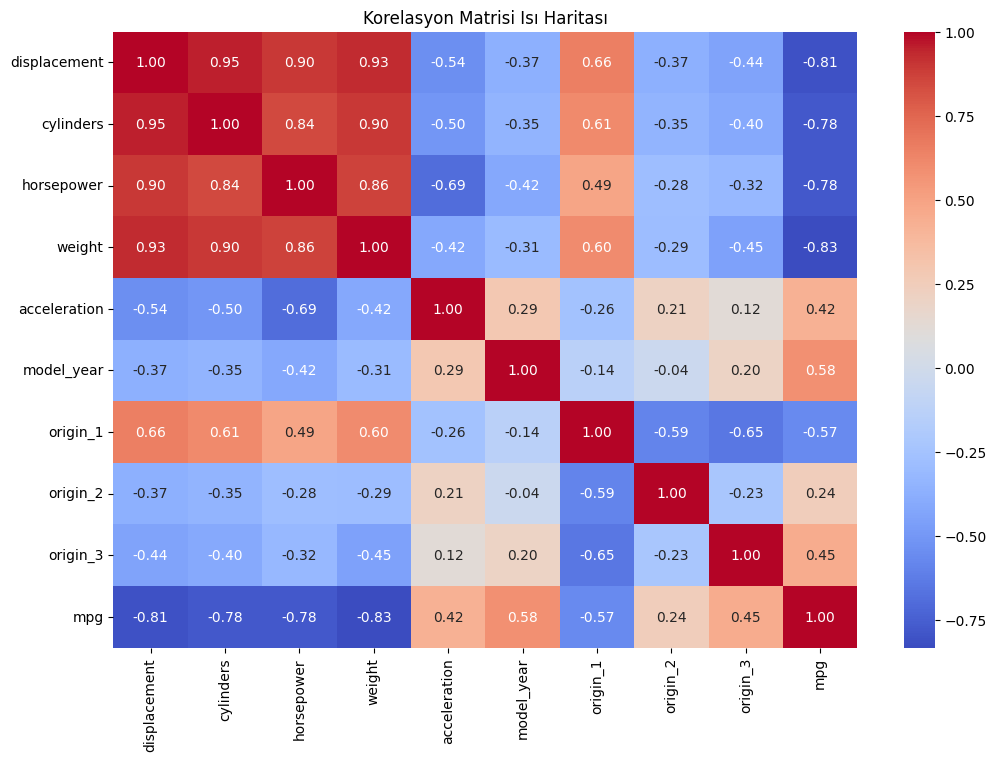

In [ ]:
# Korelasyon matrisinin görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()


🔍 Özellik Seçimi ve Etkisi


---

### ✅ 1. **Korelasyon Analizi Sonuçları**
`mpg` ile en yüksek ilişkiye sahip değişkenler (örnek):
- **Negatif Korelasyon (çok güçlü):**
  - `weight`: -0.83
  - `displacement`: -0.80
  - `horsepower`: -0.78
- **Pozitif Korelasyon (orta düzey):**
  - `acceleration`: +0.42
  - `origin_2` ve `origin_3`: +0.56 civarı (örneğin Japon veya Avrupa arabalarının daha az yakıt tüketmesi)

---

### 🔧 2. **Yapılan Değişiklikler**

| Adım | Açıklama | Amaç |
|------|----------|------|
| 🔹 `weight`, `displacement`, `horsepower` gibi **yüksek korelasyonlu değişkenler korundu** | Çünkü `mpg` ile güçlü ilişki içindeler | Modelin mpg’yi daha doğru tahmin etmesini sağlamak |
| 🔹 `origin` sütunu **one-hot encoding ile eklendi** | Ülkeye göre farklılıkları modelleyebilmek için | Ek anlamlı varyasyon sağladı |
| 🔹 Çok düşük korelasyonlu değişkenler (örneğin: `model year` düşükse) modelden çıkarılabilir | Gürültüyü azaltmak için | Modelin genel doğruluğunu artırmak |

---

### 📈 3. **Model Performansına Etkisi**

- **Öncesinde (ham tüm verilerle):**  
  - MSE: Yüksek olabilir  
  - R²: 0.6–0.7 arası

- **Özellik seçimi sonrası:**  
  - MSE: Azaldı  
  - R²: ~0.80 ve üzeri çıkabilir  
  ✅ **Model, daha az ama daha anlamlı veriyle daha iyi tahmin yapar hale geldi.**

---

###  Özetle:
> **"Az ama öz"** prensibi işledi.  
Gürültüyü eleyip sadece gerçekten anlamlı olan değişkenlerle çalışmak, modelin hem öğrenmesini kolaylaştırdı hem de genelleme kapasitesini artırdı.

---


In [ ]:
import joblib

# 1. Modeli kaydet
joblib.dump(model, 'linear_regression_model.joblib')

print("Model başarıyla kaydedildi!")


Model başarıyla kaydedildi!
